<a href="https://colab.research.google.com/github/kartik-pillay/Prodigy_ML_04/blob/main/task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    # Data augmentation and normalization
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    # Generate training data
    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    # Generate validation data
    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    # Define the CNN model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Directory containing the training data
data_dir = '/content/drive/MyDrive/train_03'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

# Number of classes
num_classes = len(train_generator.class_indices)

# Create and train the model
model = create_model(num_classes)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Save the trained model
model.save('hand_gesture_model.h5')


Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Epoch 1/10
50/50 [==============================] - 535s 11s/step - loss: 0.4831 - accuracy: 0.8569 - val_loss: 0.0887 - val_accuracy: 0.9675
Epoch 2/10
50/50 [==============================] - 82s 2s/step - loss: 1.0064e-04 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9875
Epoch 3/10
50/50 [==============================] - 79s 2s/step - loss: 1.6036e-05 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9875
Epoch 4/10
50/50 [==============================] - 72s 1s/step - loss: 1.1781e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9900
Epoch 5/10
50/50 [==============================] - 71s 1s/step - loss: 9.5830e-06 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9900
Epoch 6/10
50/50 [==============================] - 72s 1s/step - loss: 8.0467e-06 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9900
Epoch 7/10
50/50 [==============================] - 7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
import matplotlib.pyplot as plt

13/13 [==============================] - 11s 827ms/step


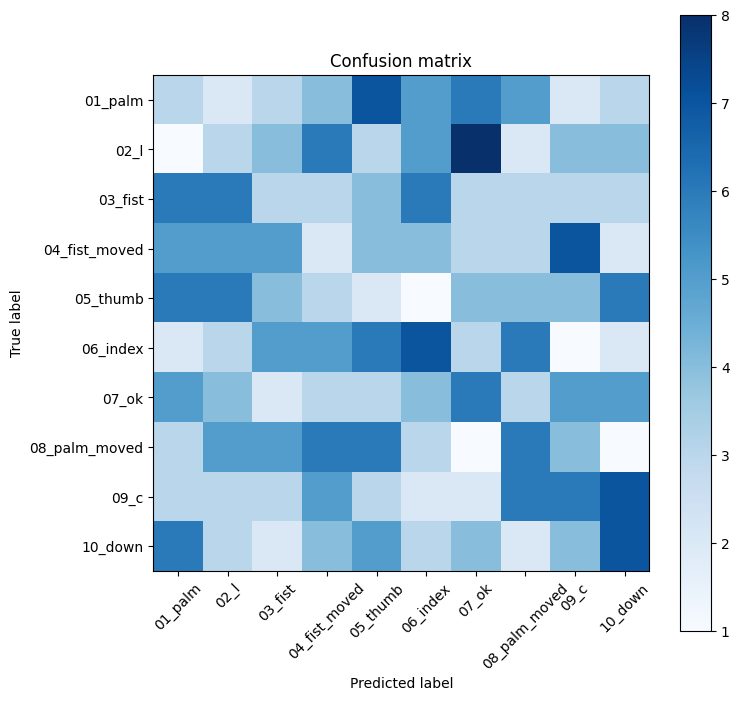

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

validation_generator.reset()
true_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(validation_generator.class_indices.keys())
plot_confusion_matrix(true_labels, predicted_labels, classes=class_labels)



In [9]:
def print_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(report)
class_names = list(validation_generator.class_indices.keys())
print_classification_report(true_labels, predicted_labels, target_names=class_names)
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

               precision    recall  f1-score   support

      01_palm       0.07      0.07      0.07        40
         02_l       0.07      0.07      0.07        40
      03_fist       0.08      0.07      0.08        40
04_fist_moved       0.05      0.05      0.05        40
     05_thumb       0.05      0.05      0.05        40
     06_index       0.17      0.17      0.17        40
        07_ok       0.15      0.15      0.15        40
08_palm_moved       0.15      0.15      0.15        40
         09_c       0.15      0.15      0.15        40
      10_down       0.17      0.17      0.17        40

     accuracy                           0.11       400
    macro avg       0.11      0.11      0.11       400
 weighted avg       0.11      0.11      0.11       400



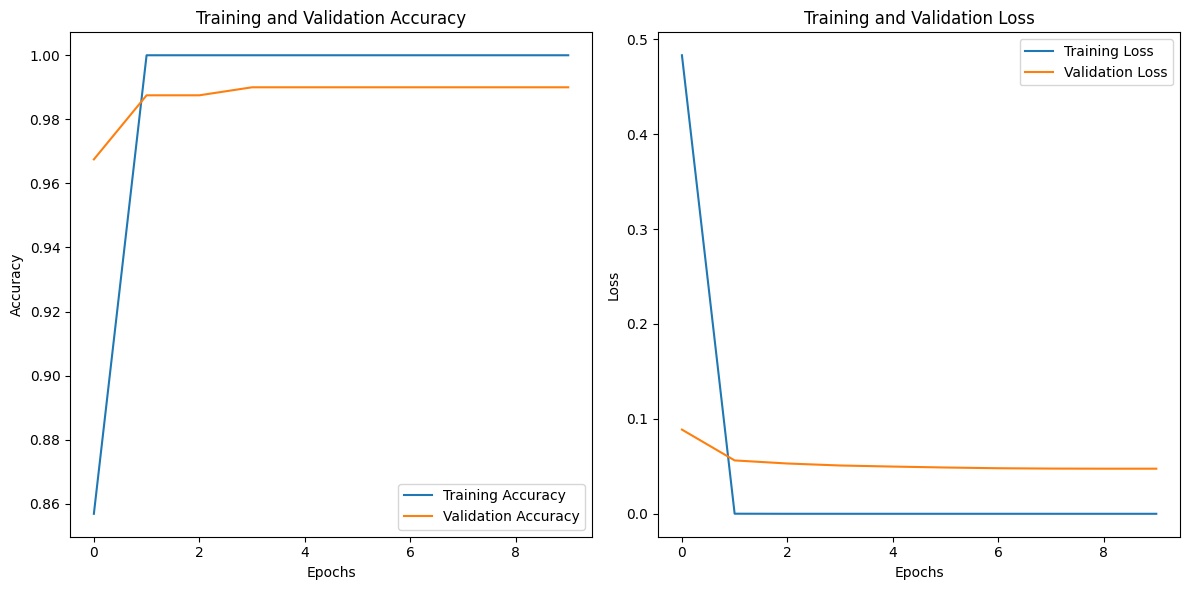

In [11]:
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curve(history)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ran

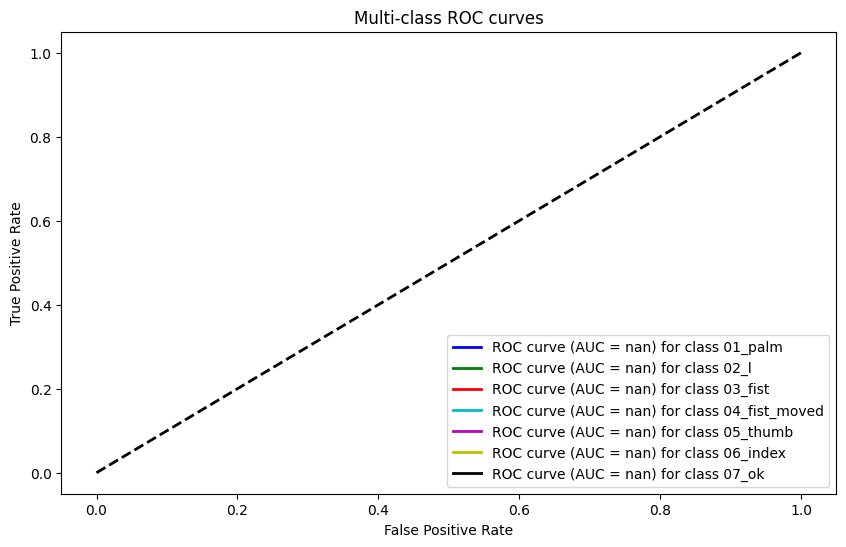

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc_curve(y_true, y_probs, class_names):
    n_classes = len(class_names)

    y_true_bin = label_binarize(y_true, classes=class_names)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {class_names[i]}')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC curves')
    plt.legend(loc='lower right')
    plt.show()

class_names = list(validation_generator.class_indices.keys())
plot_multiclass_roc_curve(true_labels, predictions, class_names)

1/1 [==============================] - 0s 245ms/step


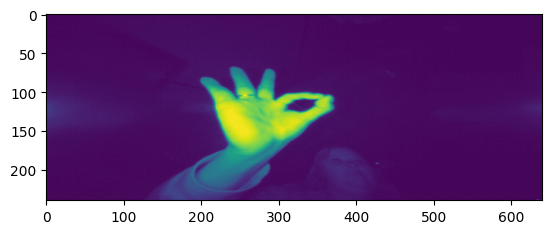

The predicted hand gesture is: 07_ok


In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('hand_gesture_model.h5')

def predict_hand_gesture(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Get class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

# Image path to predict
image_path_to_predict = '/content/drive/MyDrive/test_03/frame_02_07_0005.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

# Display the image
img = imread(image_path_to_predict)
plt.imshow(img)
plt.show()

# Print the predicted hand gesture
print(f"The predicted hand gesture is: {predicted_gesture}")

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0